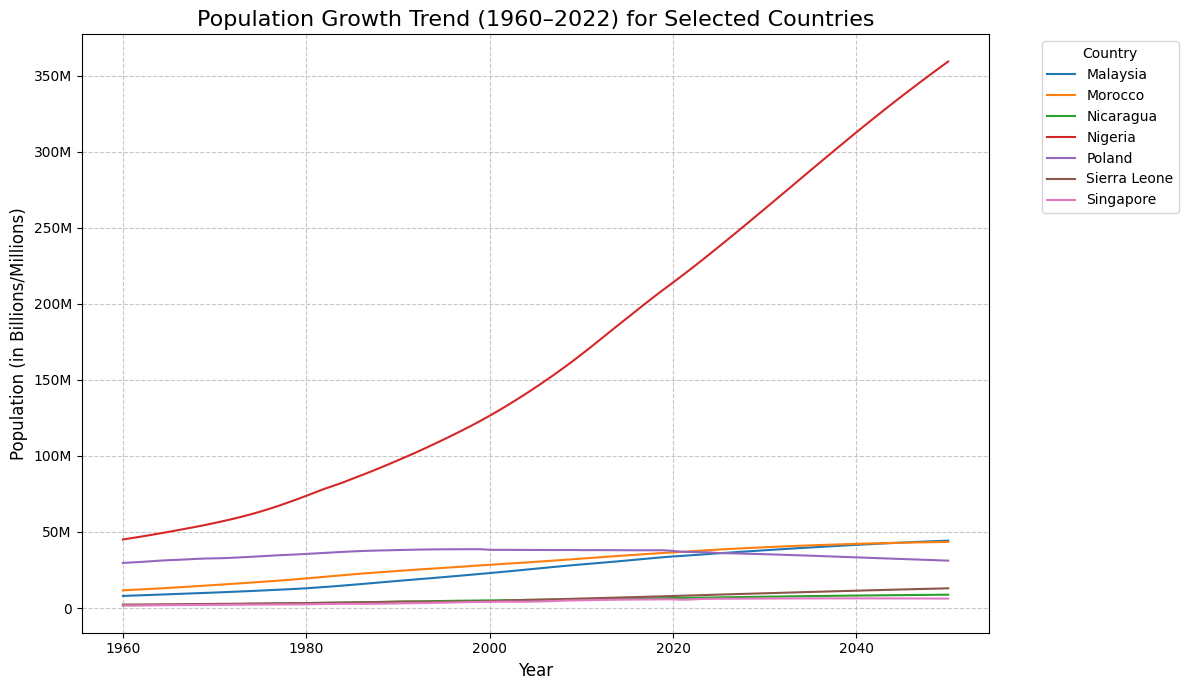

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# --- Configuration ---
file_name = 'Population-EstimatesCSV.csv'
indicator_name = 'Population, total'
target_countries = [
    'Malaysia', 'Morocco', 'Nicaragua', 'Nigeria', 'Poland',
    'Sierra Leone', 'Singapore'
]

# --- Step 1: Load and Filter Data ---
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    exit()

# Filter for the target indicator and countries
df_filtered = df[
    (df['Indicator Name'] == indicator_name) &
    (df['Country Name'].isin(target_countries))
].copy()

# Identify columns that represent years (1960 onwards)
year_columns = [col for col in df_filtered.columns if col.isdigit() and int(col) >= 1960]

# Select only the Country Name and year columns
df_ts = df_filtered[['Country Name'] + year_columns].copy()

# --- Step 2: Prepare Data for Plotting (Melt) ---
# Convert data from wide format (years as columns) to long format (Year and Population columns)
df_melted = df_ts.melt(
    id_vars=['Country Name'],
    value_vars=year_columns,
    var_name='Year',
    value_name='Population'
)

# Convert Year and Population to numeric
df_melted['Year'] = pd.to_numeric(df_melted['Year'])
df_melted['Population'] = pd.to_numeric(df_melted['Population'], errors='coerce')

# Drop rows where Population is NaN
df_melted.dropna(subset=['Population'], inplace=True)

# --- Step 3: Visualize (Line Chart) ---
plt.figure(figsize=(12, 7))

# Plot each country's population trend
for country in target_countries:
    df_country = df_melted[df_melted['Country Name'] == country]
    plt.plot(df_country['Year'], df_country['Population'], label=country)

# Format y-axis to be more readable (in millions or billions)
def format_y_tick(y, position):
    if y >= 1e9:
        return f'{y*1e-9:.1f}B'
    elif y >= 1e6:
        return f'{y*1e-6:.0f}M'
    return f'{y:.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

plt.title('Population Growth Trend (1960–2022) for Selected Countries', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (in Billions/Millions)', fontsize=12)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plot_filename = 'population_time_series_line_chart.png'
plt.savefig(plot_filename)

Plot saved to top_10_countries_final_strict_filter_bar_chart.png


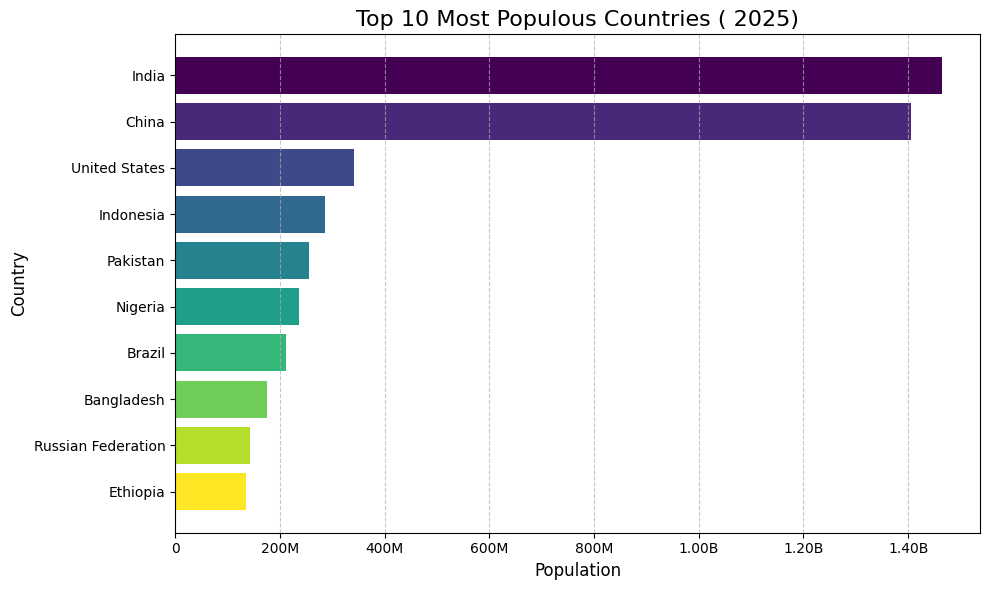

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# --- Configuration ---
file_name = 'Population-EstimatesCSV.csv'
indicator_name = 'Population, total'
target_year = '2025'

# --- Step 1 & 2: Load and Filter Data (STRICT Country Filtering) ---
df = pd.read_csv(file_name)

# Filter for the target indicator and year
df_pop_year = df[df['Indicator Name'] == indicator_name].copy()

# Define a robust regex pattern to EXCLUDE all non-country aggregates (economic, regional, organizational, demographic, and stability groupings).
aggregate_patterns = (
    r'&|\(|\bincome\b|\btotal\b|\barea\b|\baggregate\b|\bonly\b|\bdeveloping\b|\bmembers\b|\bunion\b|'
    r'\bWorld\b|\bAfrica\b|\bAsia\b|\bEurope\b|\bLatin America\b|\bCaribbean\b|\bMiddle East\b|\bOECD\b|'
    r'\bLeast developed\b|\bIDA\b|\bIBRD\b|\bNorth America\b|\bdemographic dividend\b|'
    r'\bFragile\b|\bconflict\b' # Added Fragile and conflict
)

# Apply the filter: keep rows where 'Country Name' DOES NOT match the aggregate patterns (case-insensitive)
df_pop_year_countries = df_pop_year[
    ~df_pop_year['Country Name'].str.contains(aggregate_patterns, case=False, na=False, regex=True)
].copy()

# Select Country Name and the target year
df_top_pop = df_pop_year_countries[['Country Name', target_year]].copy()
df_top_pop.rename(columns={target_year: 'Population'}, inplace=True)

# Convert population to numeric
df_top_pop['Population'] = pd.to_numeric(df_top_pop['Population'], errors='coerce')
df_top_pop.dropna(subset=['Population'], inplace=True)

# --- Step 3: Identify Top 10 Countries ---
df_top_10 = df_top_pop.sort_values(by='Population', ascending=False).head(10)

# --- Step 4 & 5: Visualize (Bar Chart) ---
plt.figure(figsize=(10, 6))

# Horizontal bar chart for better readability of long country names
countries = df_top_10['Country Name'].values
population = df_top_10['Population'].values
colors = plt.cm.viridis(np.linspace(0, 1, len(countries)))

# Plot the bars
plt.barh(countries, population, color=colors)

def format_x_tick(x, position):
    if x >= 1e9:
        return f'{x*1e-9:.2f}B'
    elif x >= 1e6:
        return f'{x*1e-6:.0f}M'
    return f'{x:.0f}'

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_tick))

plt.title(f'Top 10 Most Populous Countries ( {target_year})', fontsize=16)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plot_filename = 'top_10_countries_final_strict_filter_bar_chart.png'
plt.savefig(plot_filename)
print(f"Plot saved to {plot_filename}")

Plot saved to country_population_distribution_histogram.png


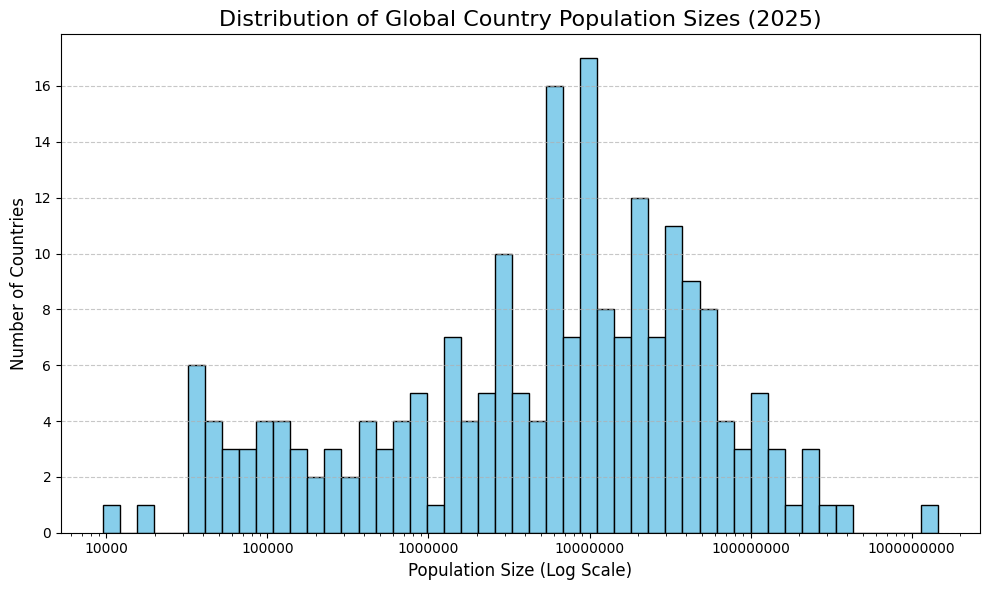

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_name = 'Population-EstimatesCSV.csv'
indicator_name = 'Population, total'
target_year = '2025'

df = pd.read_csv(file_name)

df_pop_year = df[df['Indicator Name'] == indicator_name].copy()

aggregate_patterns = (
    r'&|\(|\bincome\b|\btotal\b|\barea\b|\baggregate\b|\bonly\b|\bdeveloping\b|\bmembers\b|\bunion\b|'
    r'\bWorld\b|\bAfrica\b|\bAsia\b|\bEurope\b|\bLatin America\b|\bCaribbean\b|\bMiddle East\b|\bOECD\b|'
    r'\bLeast developed\b|\bIDA\b|\bIBRD\b|\bNorth America\b|\bdemographic dividend\b|\bFragile\b|\bconflict\b'
)

df_pop_year_countries = df_pop_year[
    ~df_pop_year['Country Name'].str.contains(aggregate_patterns, case=False, na=False, regex=True)
].copy()

df_dist = df_pop_year_countries[['Country Name', target_year]].copy()
df_dist.rename(columns={target_year: 'Population'}, inplace=True)

df_dist['Population'] = pd.to_numeric(df_dist['Population'], errors='coerce')
df_dist.dropna(subset=['Population'], inplace=True)

plt.figure(figsize=(10, 6))

bins = np.logspace(np.log10(df_dist['Population'].min()), np.log10(df_dist['Population'].max()), 50)

plt.hist(df_dist['Population'], bins=bins, edgecolor='black', color='skyblue')

plt.xscale('log')

from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)

plt.title(f'Distribution of Global Country Population Sizes ({target_year})', fontsize=16)
plt.xlabel('Population Size (Log Scale)', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plot_filename = 'country_population_distribution_histogram.png'
plt.savefig(plot_filename)
print(f"Plot saved to {plot_filename}")